**SERIE ESTACIONARIA**

Una serie es estacionaria cuando es estable a los largo del tiempo, es decir, cuando la media y la varianza son constantes a lo largo del tiempo y ademas no presenta tendencia.

Un ejemplo de una serie estacionaria es el **ruido blanco**, dado que la media es siempre constante.

**¿Como verificamos si una prueba es estacionaria o no?**

Prueba de Dickey Fuller a traves de contraste de hipotesis.

*   h0= la serie no es estacionaria
*   h1= la serie es estacionaria

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import seaborn as sns
sns.set()

In [ ]:
## Cargar datos
df = yf.download("SPY", start="2010-01-04", end="2024-01-01", interval="1d", auto_adjust=True)
print(df.shape)

[*********************100%***********************]  1 of 1 completed

(3522, 5)


In [ ]:
print(df.head())

Price           Close       High        Low       Open     Volume
Ticker            SPY        SPY        SPY        SPY        SPY
Date                                                             
2010-01-04  85.515640  85.560913  84.142320  84.791252  118944600
2010-01-05  85.742027  85.779758  85.153462  85.462839  111579900
2010-01-06  85.802391  86.013670  85.591112  85.659021  116074400
2010-01-07  86.164558  86.270198  85.402439  85.643902  131091100
2010-01-08  86.451317  86.489048  85.764659  85.938208  126402800


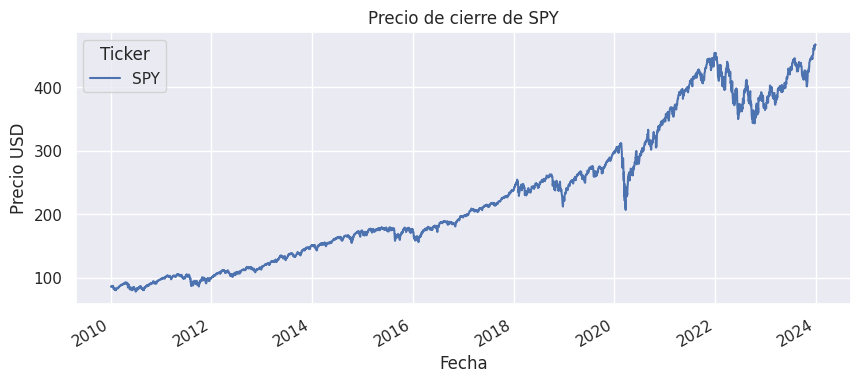

In [ ]:
## Grafico de precios de cierre
df['Close'].plot(figsize=(10, 4), title='Precio de cierre de SPY')
plt.xlabel('Fecha')
plt.ylabel('Precio USD')
plt.show()

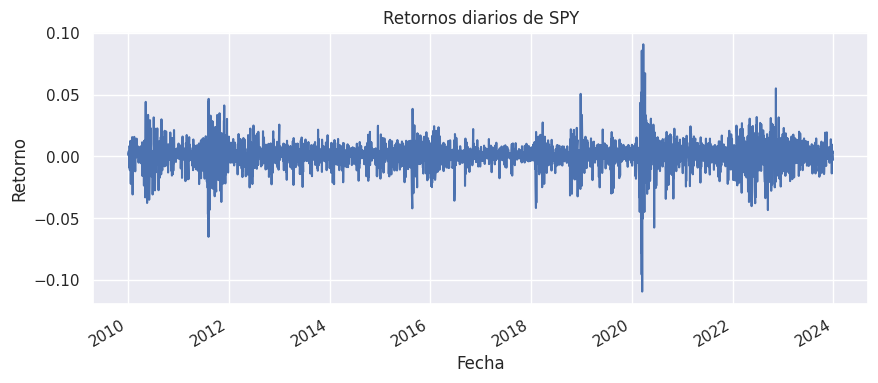

In [ ]:
## Grafico de retornos
df['Retornos'] = df['Close'].pct_change().replace([np.inf, -np.inf], np.nan) # Calcula los retornos y elimina los Nan
df = df[df['Retornos'].notna()].copy()
df['Retornos'].plot(figsize=(10, 4), title='Retornos diarios de SPY')
plt.ylabel('Retorno')
plt.xlabel('Fecha')
plt.show()

In [ ]:
## Observar datos:
print(df.head())

Price           Close       High        Low       Open     Volume  Retornos
Ticker            SPY        SPY        SPY        SPY        SPY          
Date                                                                       
2010-01-05  85.742027  85.779758  85.153462  85.462839  111579900  0.002647
2010-01-06  85.802391  86.013670  85.591112  85.659021  116074400  0.000704
2010-01-07  86.164558  86.270198  85.402439  85.643902  131091100  0.004221
2010-01-08  86.451317  86.489048  85.764659  85.938208  126402800  0.003328
2010-01-11  86.572006  86.873830  86.202262  86.836105  106375700  0.001396


**Estacionariedad**

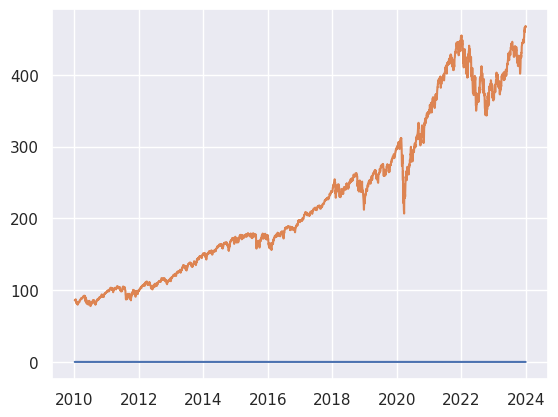

In [ ]:
plt.plot(df["Retornos"])
plt.plot(df["Close"])

In [ ]:
print(df.Retornos.describe())

count    3521.000000
mean        0.000542
std         0.010916
min        -0.109424
25%        -0.003771
50%         0.000655
75%         0.005791
max         0.090603
Name: Retornos, dtype: float64


In [ ]:
sts.adfuller(df['Close'])

(0.6082474300358899,
 0.9878171597864892,
 30,
 3490,
 {'1%': -3.4322251049466073,
  '5%': -2.8623685147472337,
  '10%': -2.567211032914344},
 16973.728529710545)

Para este caso se constrasta la hipotesis, por lo anterior la hipotesis nula bajo el parametro de que el p-valor es mayor o menor al 5%. en este caso el p-valor es del 98,76% por tal motivo la serie no es estacionaria. (NO SE RECHAZA LA HIPOTESIS NULA)

In [ ]:
sts.adfuller(df['Retornos'])

(-13.01243203189573,
 2.5513622343743005e-24,
 26,
 3494,
 {'1%': -3.432222956709344,
  '5%': -2.8623675658475816,
  '10%': -2.5672105277474606},
 -21765.645346720645)

Para lo anterior (RETORNOS) el parametro de que el p-valor es menor al 5%. en este caso el p-valor es del 2.5513844173993377e-24 por tal motivo la serie es estacionaria. (SE RECHAZA LA HIPOTESIS NULA)

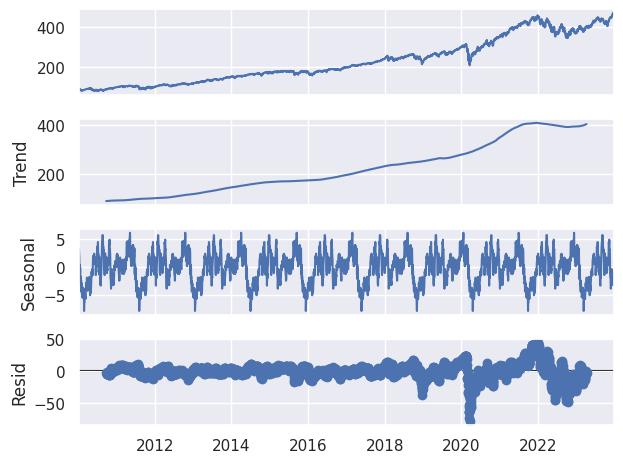

In [ ]:
## Descomponer la serie de forma aditiva.
deadi = seasonal_decompose(df['Close'], period=365)
deadi.plot()
plt.show()

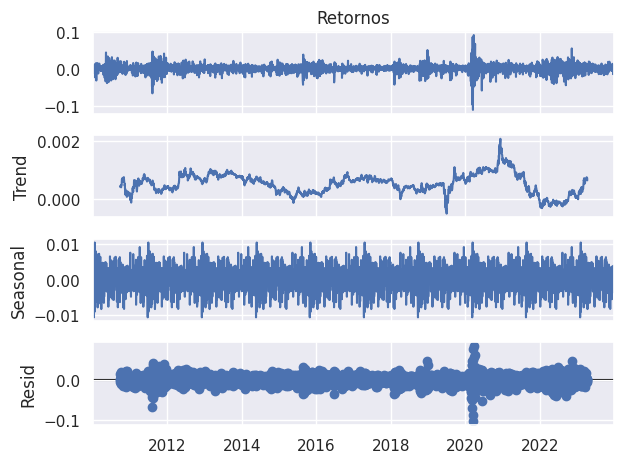

In [ ]:
## Descomponer la serie de forma aditiva.
deadiR = seasonal_decompose(df['Retornos'], period=365)
deadiR.plot()
plt.show()

**AUTOCORRELACIÓN**

La practica comun es el analisis de los primeros 40 rezagos, es decir 40 dias antes del periodo actual

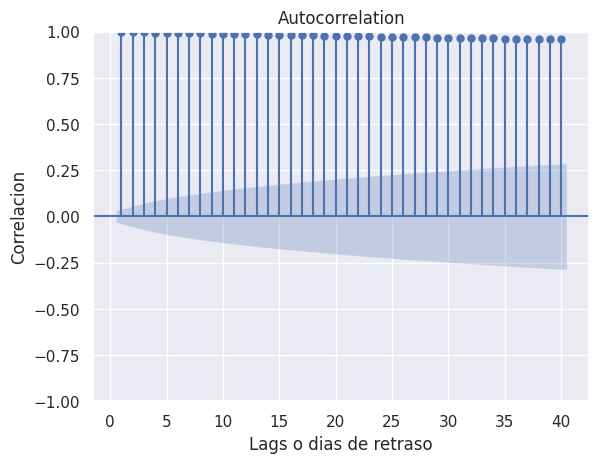

In [ ]:
sgt.plot_acf(df["Close"], lags=40, zero=False)
plt.xlabel("Lags o dias de retraso")
plt.ylabel("Correlacion")
plt.show()

de acuerdo a lo anterior todos los datos se salen de la banda, es decir que no hay estacieriedad en la serie de precios (CLOSE) no es útil para modelar; lo correcto es mirar Δprecio (primera diferencia) o retornos.

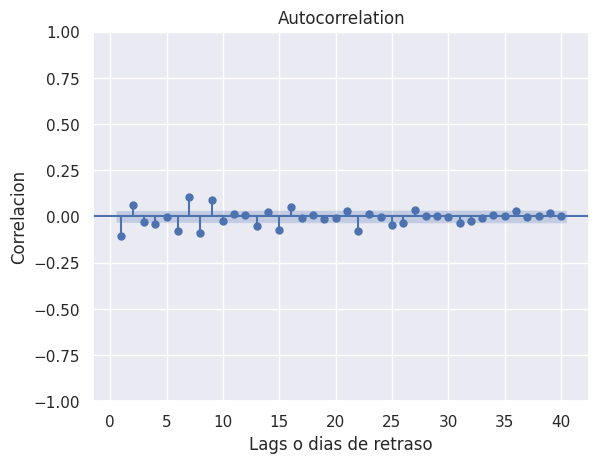

In [ ]:
sgt.plot_acf(df["Retornos"], lags=40, zero=False)
plt.xlabel("Lags o dias de retraso")
plt.ylabel("Correlacion")
plt.show()

La serie de retornos se ve bien, casi todo cerca de 0, poca o nula autocorrelación en la media (ruido blanco).

**AUTOCORRELACIÓN PARCIAL**

La practica comun es el analisis de los primeros 40 rezagos, es decir 40 dias antes del periodo actual

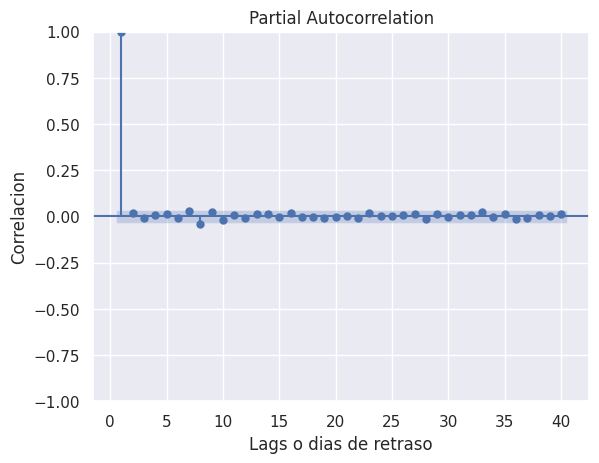

In [ ]:
sgt.plot_pacf(df["Close"], lags=40, zero=False)
plt.xlabel("Lags o dias de retraso")
plt.ylabel("Correlacion")
plt.show()

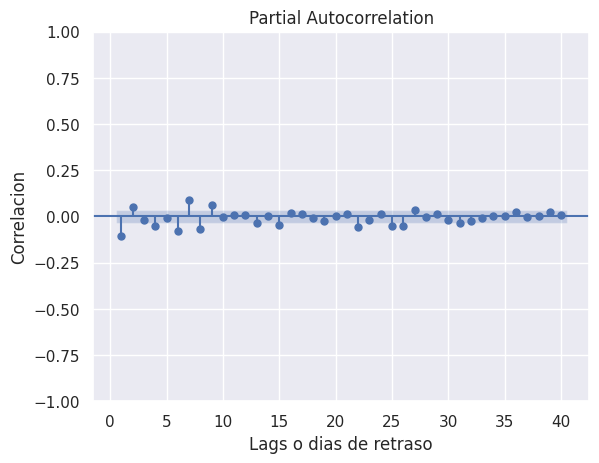

In [ ]:
sgt.plot_pacf(df["Retornos"], lags=40, zero=False)
plt.xlabel("Lags o dias de retraso")
plt.ylabel("Correlacion")
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model1 = ARIMA(df["Close"], order=(2,1,2)).fit()
print(model1.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    SPY   No. Observations:                 3521
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -8549.512
Date:                Mon, 01 Sep 2025   AIC                          17109.023
Time:                        21:56:02   BIC                          17139.854
Sample:                             0   HQIC                         17120.023
                               - 3521                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7681      0.013   -132.874      0.000      -1.794      -1.742
ar.L2         -0.8899      0.013    -70.714      0.000      -0.915      -0.865
ma.L1          1.7093      0.017    102.466      0.0

In [ ]:
#!pip uninstall -y pmdarima numpy
#!pip install numpy==1.26.4
#!pip install pmdarima==2.0.4

In [ ]:
import pmdarima as pm

# auto_arima sobre precios
model = pm.auto_arima(df["Close"],
                      seasonal=False,   # True si hay estacionalidad
                      stepwise=False,    # búsqueda rápida
                      suppress_warnings=True,
                      trace=True)       # muestra el proceso

print(model.summary())

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=17222.437, Time=0.31 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=17204.801, Time=1.50 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=17201.280, Time=2.24 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=17201.392, Time=2.67 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=17200.379, Time=4.15 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=17201.666, Time=7.17 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=17203.350, Time=0.66 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=17201.940, Time=3.26 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=17202.607, Time=5.44 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=17201.482, Time=6.95 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=17153.863, Time=7.14 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=17200.982, Time=0.84 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=17202.868, Time=1.81 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=17105.126, Time=4.86 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=17182.776, Time=9.36 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=17202.589, Time=0.77 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=17202.378, Time=2.50 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=17106.181, Time=8.49 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=17198.803, Time=1.00 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=17141.385, Time=4.17 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=17199.508, Time=1.12 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total fit time: 76.488 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3521
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -8546.563
Date:                Mon, 01 Sep 2025   AIC                          17105.126
Time:                        21:55:01   BIC                          17142.123
Sample:                             0   HQIC                         17118.326
                               - 3521                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3956      0.167      2.363      0.018       0.06

In [ ]:
# Pronóstico a 10 días
forecast = model.predict(n_periods=10)
print(forecast)

3521    466.171131
3522    466.750648
3523    466.417632
3524    466.886361
3525    466.749603
3526    466.969970
3527    467.097650
3528    467.071510
3529    467.399704
3530    467.238398
dtype: float64


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
